In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn import linear_model
from sklearn import naive_bayes,neural_network
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules,apriori
import itertools
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

%matplotlib inline
# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
trainData = pd.read_csv("../input/train.csv")
genderData = pd.read_csv("../input/gender_submission.csv")
testData = pd.read_csv("../input/test.csv")

In [3]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
genderData.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
trainData.shape

(891, 12)

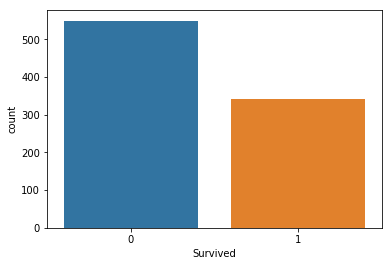

In [8]:
import seaborn as sns
sns.countplot(trainData['Survived'],label="Survived")
plt.show()

In [9]:
to_drop = ['Survived', 'Name', 'Cabin', 'Embarked','Parch']
X_train = trainData.drop(to_drop, axis=1)
y_train = trainData['Survived']
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=1)
X_test  = testData.drop("PassengerId", axis=1).copy()
to_drop = ['Name', 'Cabin', 'Embarked', 'Parch']
X_test = testData.drop(to_drop, axis = 1)
print(X_train.shape)
print(X_test.shape)
le = preprocessing.LabelEncoder()
le.fit(X_train['Sex'])
X_train = X_train.apply(le.fit_transform)
le = preprocessing.LabelEncoder()
le.fit(X_test['Sex'])
X_test = X_test.apply(le.fit_transform)


(891, 7)
(418, 7)


In [10]:
Algo = DecisionTreeClassifier()
Algo.fit(X_train, y_train)
Y_pred = Algo.predict(X_test)
Accuracy = round(Algo.score(X_train, y_train) * 100, 2)
Accuracy

100.0

In [11]:
Algo = LogisticRegression()
Algo.fit(X_train, y_train)
Y_pred = Algo.predict(X_test)
Accuracy = round(Algo.score(X_train, y_train) * 100, 2)
Accuracy

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.57

In [12]:
Algo = KNeighborsClassifier()
Algo.fit(X_train, y_train)
Y_pred = Algo.predict(X_test)
Accuracy = round(Algo.score(X_train, y_train) * 100, 2)
Accuracy

76.99

In [13]:
Algo = LinearDiscriminantAnalysis()
Algo.fit(X_train, y_train)
Y_pred = Algo.predict(X_test)
Accuracy = round(Algo.score(X_train, y_train) * 100, 2)
Accuracy

79.35

In [14]:
Algo = GaussianNB()
Algo.fit(X_train, y_train)
Y_pred = Algo.predict(X_test)
Accuracy = round(Algo.score(X_train, y_train) * 100, 2)
Accuracy

77.22

In [15]:
Algo = SVC()
Algo.fit(X_train, y_train)
Y_pred = Algo.predict(X_test)
Accuracy = round(Algo.score(X_train, y_train) * 100, 2)
Accuracy

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


100.0